<h1><center>Ciência dos Dados - PROJETO 1</center></h1>
<h2><center>Gabriella Escobar Cukier</center></h2>


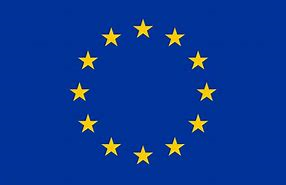

<h1><center>União Europeia</center></h1>




Considerado o maior bloco econômico do mundo, a União Europeia é formada por 28 países. Entre eles, há ivre circulação de bens, mercadorias e pessoas e o uso de uma moeda única.
Oficialmente, foi fundada em 1992, mas sua formação fundamentou-se em um longo processo atrelado a acordos intergovernamentais anteriores.
O número de países membros foi aumentando ao longo dos anos. Em 2004 ocorreu a entrada no bloco com o maior número de membros. Por esse motivo, o ano em questão, assim como os países que participaram dessa adesão foram  selecionados como base para uma análise mais aprofundada das consequências da entrada no bloco.


## Pergunta (s) a ser respondida
### Como a entrada na União Europeia afeta o desemprego em um país?

In [ ]:
variavel qualitativa - escolha de paises

## Explicação da hipótese e mecanismo

## Bases de dados usadas

## Análise de dados

In [59]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [60]:
europa = pd.read_excel('paises_UE.xlsx')
europa.head()

,country,EU,selecao
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,Andorra,0,2
4,Angola,0,0


In [61]:
europa['EU'].value_counts()

0    159
1     28
Name: EU, dtype: int64

## Escolha dos países a serem analisados

Para uma melhor comparação serão escolhidos países de um nível socioeconômico semelhante

In [62]:
idh = pd.read_excel('idh.xlsx')
gdp= pd.read_excel('gdp_capta.xlsx')
gini= pd.read_excel('eur_gini.xlsx')
unemployment=pd.read_excel('unemployment.xlsx')

In [63]:
europa['GDP']=gdp.loc[:,[(2015)]]

In [64]:
europa['IDH']=idh.loc[:,[(2015)]]
europa.head()

,country,EU,selecao,GDP,IDH
0,Afghanistan,0,0,1750,0.479
1,Albania,0,0,11000,0.764
2,Algeria,0,0,13700,0.745
3,Andorra,0,2,46600,0.858
4,Angola,0,0,6230,0.533


In [65]:
faixasIDH= europa.loc[:,'IDH']
faixasIDH

europa['Faixas_IDH'] = pd.cut(faixasIDH, bins=20)

faixasGDP=europa.loc[:,'GDP']
europa['Faixas_GDP']=  pd.cut(faixasGDP, bins=20)
europa.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
0,Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
1,Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
2,Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
4,Angola,0,0,6230,0.533,"(0.531, 0.561]","(503.623, 6591.85]"


In [66]:
df=europa[europa['EU']==1]
df.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
9,Austria,1,0,44100,0.893,"(0.889, 0.919]","(42404.95, 48373.8]"
16,Belgium,1,0,41700,0.896,"(0.889, 0.919]","(36436.1, 42404.95]"
25,Bulgaria,1,0,17000,0.794,"(0.77, 0.8]","(12560.7, 18529.55]"
42,Croatia,1,0,20600,0.827,"(0.8, 0.83]","(18529.55, 24498.4]"
44,Cyprus,1,1,30400,0.856,"(0.83, 0.859]","(24498.4, 30467.25]"


In [67]:
mundo=europa[europa['EU']==0]
mundo.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
0,Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
1,Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
2,Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
4,Angola,0,0,6230,0.533,"(0.531, 0.561]","(503.623, 6591.85]"


In [68]:
europa['GDP'].describe()

count       187.000000
mean      17819.786096
std       19284.491796
min         623.000000
25%        3410.000000
50%       11400.000000
75%       24900.000000
max      120000.000000
Name: GDP, dtype: float64

In [69]:
df['Faixas_GDP'].value_counts()

(24498.4, 30467.25]      6
(6591.85, 12560.7]       4
(18529.55, 24498.4]      4
(12560.7, 18529.55]      3
(36436.1, 42404.95]      3
(42404.95, 48373.8]      3
(503.623, 6591.85]       2
(90155.75, 96124.6]      1
(30467.25, 36436.1]      1
(60311.5, 66280.35]      1
(48373.8, 54342.65]      0
(114031.15, 120000.0]    0
(108062.3, 114031.15]    0
(66280.35, 72249.2]      0
(72249.2, 78218.05]      0
(78218.05, 84186.9]      0
(84186.9, 90155.75]      0
(96124.6, 102093.45]     0
(102093.45, 108062.3]    0
(54342.65, 60311.5]      0
Name: Faixas_GDP, dtype: int64

In [70]:
df['Faixas_IDH'].value_counts()

(0.83, 0.859]     8
(0.889, 0.919]    8
(0.859, 0.889]    5
(0.919, 0.949]    4
(0.8, 0.83]       2
(0.77, 0.8]       1
(0.531, 0.561]    0
(0.382, 0.412]    0
(0.412, 0.442]    0
(0.442, 0.471]    0
(0.471, 0.501]    0
(0.501, 0.531]    0
(0.621, 0.65]     0
(0.561, 0.591]    0
(0.591, 0.621]    0
(0.65, 0.68]      0
(0.68, 0.71]      0
(0.71, 0.74]      0
(0.74, 0.77]      0
(0.351, 0.382]    0
Name: Faixas_IDH, dtype: int64

In [71]:
comparacao = mundo[((mundo['IDH']>0.83)) & ((mundo['GDP']>24498))]
comparacao

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
8,Australia,0,2,43800,0.939,"(0.919, 0.949]","(42404.95, 48373.8]"
24,Brunei,0,2,74600,0.865,"(0.859, 0.889]","(72249.2, 78218.05]"
30,Canada,0,2,43000,0.920,"(0.919, 0.949]","(42404.95, 48373.8]"
74,Iceland,0,2,42700,0.921,"(0.919, 0.949]","(42404.95, 48373.8]"
80,Israel,0,2,32000,0.899,"(0.889, 0.919]","(30467.25, 36436.1]"
83,Japan,0,2,37800,0.903,"(0.889, 0.919]","(36436.1, 42404.95]"
96,Liechtenstein,0,2,27000,0.912,"(0.889, 0.919]","(24498.4, 30467.25]"
151,South Korea,0,2,28300,0.901,"(0.889, 0.919]","(24498.4, 30467.25]"


In [72]:
mundo[mundo['country']=='United States']

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
178,United States,0,2,15000,0.92,"(0.919, 0.949]","(12560.7, 18529.55]"


# Análise temporal

E

In [73]:
analise = unemployment.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
analise.head()

,2000,2002,2004,2006,2008
0,NaN,NaN,NaN,NaN,2.49
1,NaN,NaN,NaN,NaN,13.10
2,29.8,25.9,17.6,12.3,11.30
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [74]:
paises2= pd.read_excel('paises_UE.xlsx')

analisePaises=paises2.join(analise, lsuffix='', rsuffix='')
analisePaises.tail()

,country,EU,selecao,2000,2002,2004,2006,2008
182,Venezuela,0,0,2.26,2.12,2.14,NaN,2.38
183,Vietnam,0,0,NaN,NaN,NaN,NaN,NaN
184,Yemen,0,0,NaN,NaN,NaN,NaN,7.93
185,Zambia,0,0,NaN,NaN,4.39,NaN,NaN
186,Zimbabwe,0,0,NaN,NaN,NaN,NaN,NaN


In [75]:
analiseUE=analisePaises[analisePaises['selecao']==1]
analiseUE

,country,EU,selecao,2000,2002,2004,2006,2008
44,Cyprus,1,1,4.48,4.27,5.20,3.90,3.43
45,Czech Republic,1,1,NaN,NaN,NaN,NaN,NaN
55,Estonia,1,1,10.20,8.70,8.91,8.45,7.06
73,Hungary,1,1,NaN,NaN,NaN,NaN,NaN
91,Latvia,1,1,1.27,1.45,2.40,2.46,NaN
97,Lithuania,1,1,3.00,3.48,3.54,3.32,3.34
105,Malta,1,1,8.46,6.80,8.17,7.38,3.98
133,Poland,1,1,6.97,8.11,7.72,7.27,5.79
147,Slovak Republic,1,1,NaN,NaN,NaN,NaN,NaN
148,Slovenia,1,1,30.20,33.50,29.60,28.50,22.40


In [76]:
analiseOutros=analisePaises[analisePaises['selecao']==2]
analiseOutros

,country,EU,selecao,2000,2002,2004,2006,2008
3,Andorra,0,2,NaN,NaN,NaN,NaN,NaN
8,Australia,0,2,4.69,4.85,5.83,5.24,4.13
24,Brunei,0,2,16.20,18.10,12.00,8.95,5.61
30,Canada,0,2,NaN,NaN,NaN,NaN,NaN
74,Iceland,0,2,4.32,4.22,4.49,4.41,6.77
80,Israel,0,2,NaN,9.33,8.40,7.79,6.63
83,Japan,0,2,0.80,1.10,1.70,NaN,NaN
96,Liechtenstein,0,2,NaN,NaN,NaN,NaN,NaN
151,South Korea,0,2,13.80,11.10,11.10,8.45,11.30
178,United States,0,2,13.30,16.90,13.00,10.80,8.03


É possível observar nos dados das tabelas que alguns países, tanto da União Europeia como fora dela, não possuem dados suficientes referentes para análise à evolução do desemprego.
Por conta disso, optou-se por retirá-los da análise.
Esses países foram:
    Na europa:
        -República Checa
        -Hungária
        -Eslováquia
    Outros países:
        -Andorra
        -Canadá
        -Liechtenstein

In [77]:
analiseUE.iloc[[0,2,4,5,6,7,9]]


,country,EU,selecao,2000,2002,2004,2006,2008
44,Cyprus,1,1,4.48,4.27,5.20,3.90,3.43
55,Estonia,1,1,10.20,8.70,8.91,8.45,7.06
91,Latvia,1,1,1.27,1.45,2.40,2.46,NaN
97,Lithuania,1,1,3.00,3.48,3.54,3.32,3.34
105,Malta,1,1,8.46,6.80,8.17,7.38,3.98
133,Poland,1,1,6.97,8.11,7.72,7.27,5.79
148,Slovenia,1,1,30.20,33.50,29.60,28.50,22.40


In [78]:
analiseOutros.iloc[[1,2,4,5,6,8,9]]


,country,EU,selecao,2000,2002,2004,2006,2008
8,Australia,0,2,4.69,4.85,5.83,5.24,4.13
24,Brunei,0,2,16.20,18.10,12.00,8.95,5.61
74,Iceland,0,2,4.32,4.22,4.49,4.41,6.77
80,Israel,0,2,NaN,9.33,8.40,7.79,6.63
83,Japan,0,2,0.80,1.10,1.70,NaN,NaN
151,South Korea,0,2,13.80,11.10,11.10,8.45,11.30
178,United States,0,2,13.30,16.90,13.00,10.80,8.03


In [104]:
faixa=range(2,18,2)

eu2000= pd.cut(analiseUE[2000], faixa, False)
ue1=(eu2000.value_counts(True)*100).round(decimals=1)
eu2000.value_counts()


[10, 12)    1
[8, 10)     1
[6, 8)      1
[4, 6)      1
[2, 4)      1
[14, 16)    0
[12, 14)    0
Name: 2000, dtype: int64

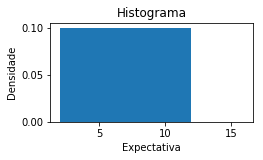

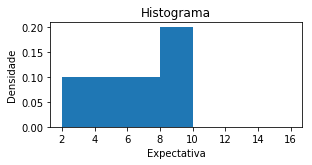

In [105]:
fig=plt.figure(figsize=(8,4))
plt.subplot(221)
analiseUE[2000].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))

fig=plt.figure(figsize=(8,4))
plt.subplot(222)
analiseUE[2002].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))



plt.tight_layout()
plt.show()
    

Text(0.5, 1.0, 'Nível de desemprego  de 2004')

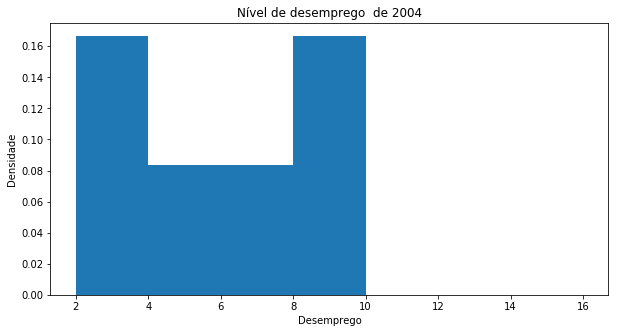

In [106]:
fig=plt.figure(figsize=(10,5))
analiseUE[2004].plot.hist(bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Nível de desemprego  de 2004'))



Text(0.5, 1.0, 'Nível de desemprego  de 2008')

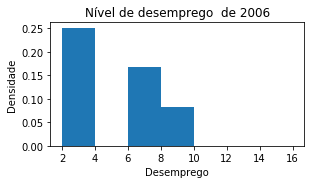

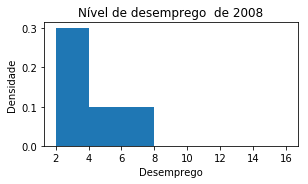

In [107]:
fig=plt.figure(figsize=(10,5))
plt.subplot(221)
analiseUE[2006].plot.hist(bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Nível de desemprego  de 2006'))

fig=plt.figure(figsize=(10,5))
plt.subplot(222)
analiseUE[2008].plot.hist(bins=faixa, density=True)
plt.xlabel('Desemprego')
plt.ylabel('Densidade')
plt.title(('Nível de desemprego  de 2008'))

## Outros países

Text(0.5, 1.0, 'Histograma')

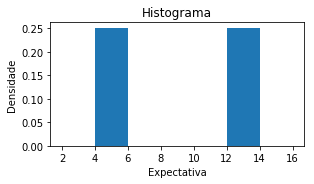

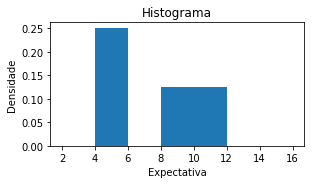

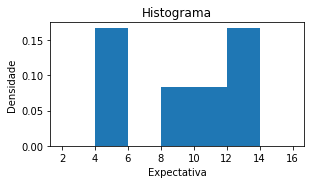

In [108]:
fig=plt.figure(figsize=(10,5))
plt.subplot(221)
analiseOutros[2000].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))

fig=plt.figure(figsize=(10,5))
plt.subplot(222)
analiseOutros[2002].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))


fig=plt.figure(figsize=(10,5))
plt.subplot(223)
analiseOutros[2004].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))




Text(0.5, 1.0, 'Histograma')

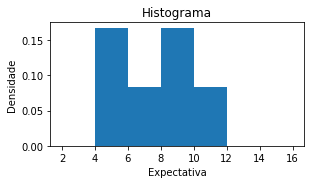

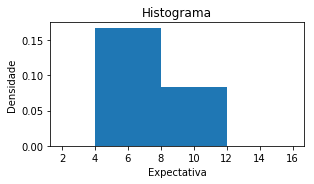

In [109]:
fig=plt.figure(figsize=(10,5))
plt.subplot(224)
analiseOutros[2006].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))


fig=plt.figure(figsize=(10,5))
plt.subplot(224)
analiseOutros[2008].plot.hist(bins=faixa, density=True)
plt.xlabel('Expectativa')
plt.ylabel('Densidade')
plt.title(('Histograma'))

## Conclusão